**LeNet 5** architecture is the "Hello World" in the domain of Convolution Neural Networks. The backpropagation rule was first applied to all reasonable applications in 1989 by Yann LeCun and colleagues at Bell Labs.

LeNet is a convolutional neural network that Yann LeCun introduced in 1989. LeNet is a common term for LeNet-5, a simple convolutional neural network.

The LeNet-5 signifies CNN’s emergence and outlines its core components. However, it was not popular at the time due to a lack of hardware, especially GPU (Graphics Process Unit, a specialised electronic circuit designed to change memory to accelerate the creation of images during a buffer intended for output to a show device) and alternative algorithms, like SVM, which could perform effects similar to or even better than those of the LeNet.

**Features of LeNet-5**:
- Every convolutional layer includes three parts: convolution, pooling, and nonlinear activation functions
- Using convolution to extract spatial features (Convolution was called receptive fields originally)
- The average pooling layer is used for subsampling.
- ‘tanh’ is used as the activation function
- Using Multi-Layered Perceptron or Fully Connected Layers as the last classifier
- The sparse connection between layers reduces the complexity of computation

### Architecture

The LeNet-5 CNN architecture has seven layers. Three convolutional layers, two subsampling layers, and two fully linked layers make up the layer composition.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/lenet-5 architecture.webp" width="900" />
</div>

**First Layer**

A 32x32 grayscale image serves as the input for LeNet-5 and is processed by the first convolutional layer comprising six feature maps or filters with a stride of one. From 32x32x1 to 28x28x6, the image’s dimensions shift.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/first_layer.webp" width="700" />
</div>

**Second Layer**

Then, using a filter size of 22 and a stride of 2, the LeNet-5 adds an average pooling layer or sub-sampling layer. 14x14x6 will be the final image’s reduced size.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/second_layer.webp" width="700" />
</div>

**Third Layer**

A second convolutional layer with 16 feature maps of size 55 and a stride of 1 is then present. Only 10 of the 16 feature maps in this layer are linked to the six feature maps in the layer below, as can be seen in the illustration below.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/third_layer.webp" width="700" />
</div>

The primary goal is to disrupt the network’s symmetry while maintaining a manageable number of connections. Because of this, there are 1516 training parameters instead of 2400 in these layers, and similarly, there are 151600 connections instead of 240000.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/third_layer2.webp" width="700" />
</div>

**Fourth Layer**

With a filter size of 22 and a stride of 2, the fourth layer (S4) is once more an average pooling layer. The output will be decreased to 5x5x16 because this layer is identical to the second layer (S2) but has 16 feature maps.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/fourth_layer.webp" width="700" />
</div>

**Fifth Layer**

With 120 feature maps, each measuring 1 x 1, the fifth layer (C5) is a fully connected convolutional layer. All 400 nodes (5x5x16) in layer four, S4, are connected to each of the 120 units in C5’s 120 units.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/fifth_layer.webp" width="700" />
</div>

**Sixth Layer**

A fully connected layer (F6) with 84 units makes up the sixth layer.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/sixth_layer.webp" width="700" />
</div>

**Output Layer**

The SoftMax output layer, which has 10 potential values and corresponds to the digits 0 to 9, is the last layer.

<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/output_layer.webp" width="700" />
</div>

### Summary of LeNet-5 Architecture


<div style="display:flex;align-items:center;justify-content:center;">
    <img src="images/lenet5_summary.webp" width="800" />
</div>

### Implementation

We will be implementing the LeNet-5 Architecture on the MNIST Dataset because MNIST Dataset has images of 28x28 size which have characters are written that will help to show the better implementation of the architecture.

**download and load the dataset**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**Pre-processing and Normalizing the Data**

In [2]:
rows, cols = 28, 28

# Reshape the data into 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

# Set type as float32 and normalize the values to [0,1]
x_trian = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

**Define LeNet-5 Model**

> It is important to highlight that each image in the MNIST data set has a size of 28 X 28 pixels so we will use the same dimensions for LeNet-5 input instead of 32 X 32 pixels.

In [9]:
def build_lenet(input_shape):
    # Define Sequential Model
    model = tf.keras.Sequential()

    # C1 Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

    # S2 SubSampling layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    # C3 Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

    # S4 SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    # C5 Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

    # Flatten th eoutput so taht we can connect it with the uflly connected layers by converting it into 1D Aray
    model.add(tf.keras.layers.Flatten())

    # FC6 Fully Connected Layers
    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

    # Output Layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Compile the Model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

    return model

In [10]:
lenet = build_lenet(input_shape)

In [11]:
epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7977 - loss: 0.7425
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9361 - loss: 0.2129
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9560 - loss: 0.1499
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9648 - loss: 0.1204
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9699 - loss: 0.1001
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9743 - loss: 0.0869
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9769 - loss: 0.0755
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9804 - loss: 0.0664
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9817 - loss: 0.0614
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9841 - loss: 0.0532


In [12]:
loss, acc = lenet.evaluate(x_test, y_test)
print('Accuracy:', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0658
Accuracy: 0.9835000038146973


In [13]:
x_train = x_train.reshape(x_train.shape[0], 28,28)
print('Training Data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print('Test Data', x_test.shape, y_test.shape)

Training Data (60000, 28, 28) (60000, 10)
Test Data (10000, 28, 28) (10000, 10)


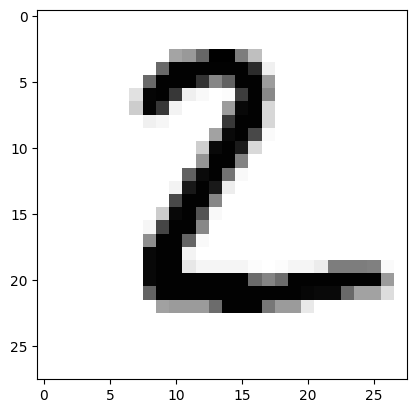

In [23]:
image_index = 1
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
plt.show()

In [24]:
pred = lenet.predict(x_test[image_index].reshape(1,rows,cols,1))
print(pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2
